# Visualización Pasiva - COVID-19

# PUNTO 1.a

## 1. Tomar datos del csv genereado en el TP3

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
# Borro las columnas que no me sirven
def eliminar_columnas(ruta):
    datos = pd.read_csv(ruta)
    df = pd.DataFrame(datos)
    df.drop(['code','name','pop_dens','country_percentage','dia_inicio','dia_cuarentena','ciudad','tot_fallecidos','transmision_tipo','informe_tipo','fuente'], axis='columns', inplace=True)
    df.to_csv('datos_sin_columna.csv', index=False)


ruta_csv = 'innerjoins.csv'
eliminar_columnas(ruta_csv)


In [48]:
mydateparser = lambda x: datetime.strptime(x, "%d/%m/%Y" )
datos = pd.read_csv('datos_sin_columna.csv', parse_dates=['fecha'],date_parser=mydateparser)
df = pd.DataFrame(datos)
df

,total_pop,fecha,provincia,tot_casosconf,nue_casosconf
0,13827203,2020-03-05,Buenos Aires,2,1
1,13827203,2020-03-08,Buenos Aires,10,8
2,13827203,2020-03-10,Buenos Aires,20,1
3,13827203,2020-03-11,Buenos Aires,22,1
4,13827203,2020-03-13,Buenos Aires,34,1
...,...,...,...,...,...
1891,127205,2020-07-06,Tierra del Fuego,80447,0
1892,127205,2020-07-07,Tierra del Fuego,83426,0
1893,127205,2020-07-08,Tierra del Fuego,87029,0
1894,127205,2020-07-09,Tierra del Fuego,90692,1


## 2. Busco las 10 provincias con mas casos

In [4]:
group_a = df.groupby('provincia')

tot_casos_p = []
for key, item in group_a:
    tot_casos_p.append({"provincia":key, "total_casos":item['nue_casosconf'].sum()})


In [5]:
tot_casos_p.sort(key=lambda c: c['total_casos'], reverse=True)
print("10 provincias con mas casos\n")

for i in range(10):    
    print(tot_casos_p[i]['provincia'])

10 provincias con mas casos

Buenos Aires
CABA
Chaco
Río Negro
Córdoba
Neuquén
Santa Fe
Entre Ríos
Jujuy
Mendoza


## 3. Borro del DF las provincias que no me interesan

In [6]:
provincias_borrar = ['Chubut','Catamarca', 'Corrientes','Formosa','La Pampa', 'La Rioja','Misiones','Salta', 'San Juan','San Luis','Santa Cruz', 'Santiago del Estero','Tierra del Fuego', 'Tucumán']

for provin in provincias_borrar:
    df = df.drop(df[df['provincia']==provin].index)

group_a = df.groupby('provincia')

tot_casos_p = []
for key, item in group_a:
    tot_casos_p.append({"provincia":key, "total_casos":item['nue_casosconf'].sum()})
tot_casos_p.sort(key=lambda c: c['total_casos'], reverse=True)


## 4. Parseo la fecha y la agrego al df (para poder agrupar los datos en los graficos)

In [7]:

#separados = df['fecha'].str.split('/')
'''for f in separados:
    dias.append(f[0])

for f in separados:
    meses.append(f[1])

for f in separados:
    anios.append(f[2])'''
dias = []
meses = []
anios = []

for i in df.index:
    dias.append(df['fecha'][i].day)
    meses.append(df['fecha'][i].month)
    anios.append(df['fecha'][i].year)

In [8]:
df['dia'] = dias
df['mes'] = meses
df['anio'] = anios

df

,total_pop,fecha,provincia,tot_casosconf,nue_casosconf,dia,mes,anio
0,13827203,2020-03-05,Buenos Aires,2,1,5,3,2020
1,13827203,2020-03-08,Buenos Aires,10,8,8,3,2020
2,13827203,2020-03-10,Buenos Aires,20,1,10,3,2020
3,13827203,2020-03-11,Buenos Aires,22,1,11,3,2020
4,13827203,2020-03-13,Buenos Aires,34,1,13,3,2020
...,...,...,...,...,...,...,...,...
1650,880543,2020-07-06,Jujuy,80382,29,6,7,2020
1651,880543,2020-07-07,Jujuy,83335,30,7,7,2020
1652,880543,2020-07-08,Jujuy,86931,38,8,7,2020
1653,880543,2020-07-09,Jujuy,90619,52,9,7,2020


## 5. Agrupo provincias

In [9]:
buenos_aires = df[df['provincia']== 'Buenos Aires']
caba = df[df['provincia']== 'CABA']
chaco = df[df['provincia']== 'Chaco']

rnegro = df[df['provincia']=='Río Negro']
cordoba = df[df['provincia']== 'Córdoba']
jujuy = df[df['provincia']=='Jujuy']
ciencuenta = rnegro.append(cordoba, ignore_index=True)
ciencuenta = ciencuenta.append(jujuy, ignore_index=True)

neuquen = df[df['provincia']=='Neuquén']
fe = df[df['provincia']=='Santa Fe']
treinta = neuquen.append(fe,ignore_index=True )

rios = df[df['provincia']=='Entre Ríos']
mendoza = df[df['provincia']=='Mendoza']
veinte = mendoza.append(rios, ignore_index=True)

## 6. Empiezo a Graficar

Text(0.5, 1.0, 'Curva de Crecimiento en Dias')

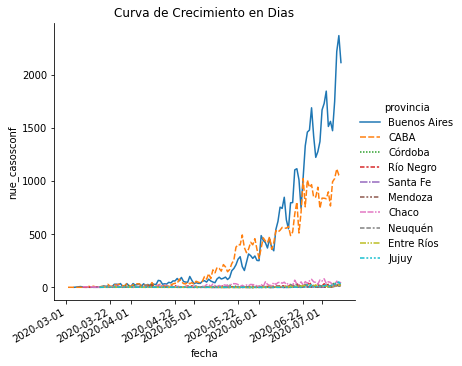

In [10]:
g= sns.relplot(data=df, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Curva de Crecimiento en Dias")        

Este primer grafico representa la curva de crecimiento de las 10 provincias con mas casos, durante los meses de marzo a julio. Como la cantidad de casos varia de una provincia a otra, aquellas que tienen menor cantidad no se aprecian en el grafico. 

Text(0.5, 1.0, 'Menzoda, Entre Rios')

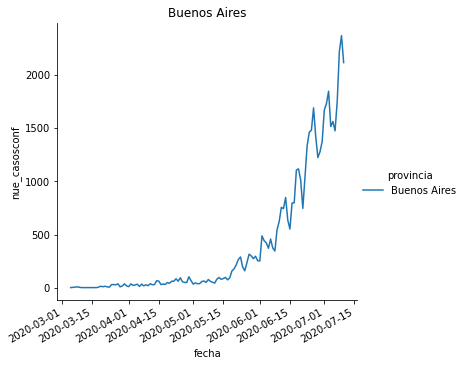

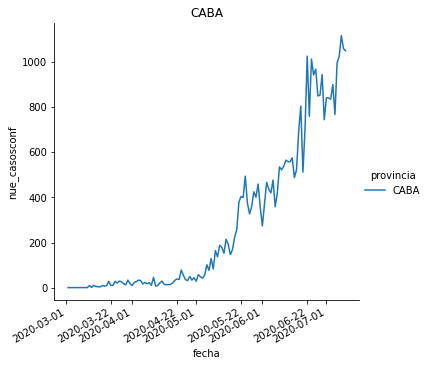

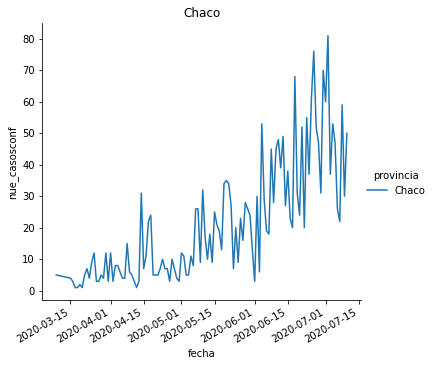

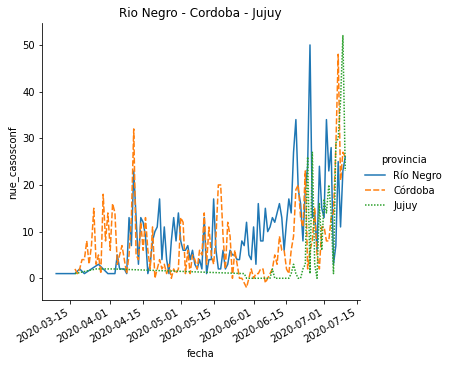

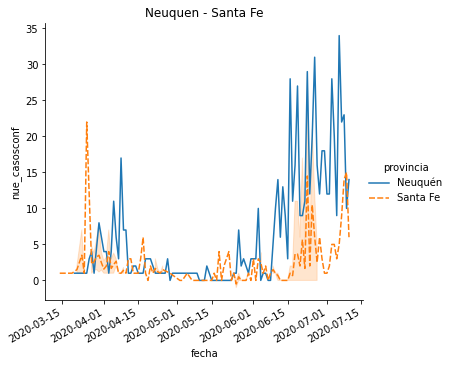

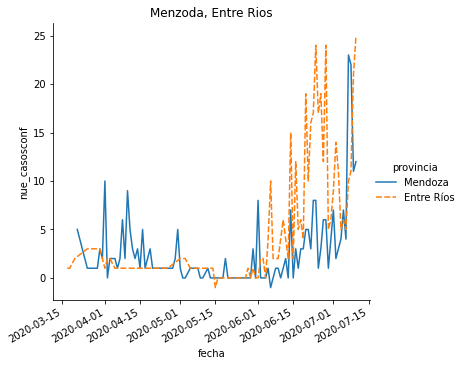

In [11]:

g= sns.relplot(data=buenos_aires, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Buenos Aires")

g= sns.relplot(data=caba, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("CABA")

g= sns.relplot(data=chaco, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Chaco")

g= sns.relplot(data=ciencuenta, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Rio Negro - Cordoba - Jujuy")

g= sns.relplot(data=treinta, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Neuquen - Santa Fe")

g= sns.relplot(data=veinte, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.fig.autofmt_xdate()
g.ax.set_title("Menzoda, Entre Rios")

Esta salida representa el mismo grafico anterior pero agrupando las provincias con casos similares para poder apreciar su curva de crecimiento. 

Text(0.5, 1.0, 'Curva de Crecimiento en Meses')

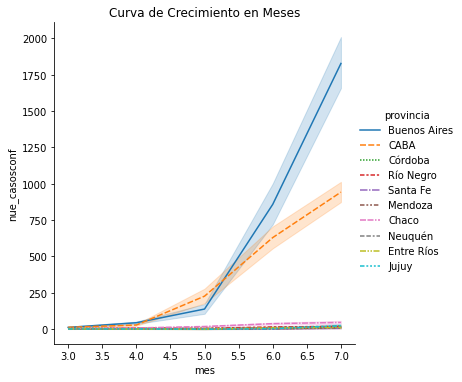

In [12]:
g = sns.relplot(data=df, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Curva de Crecimiento en Meses")

Este segundo grafico representa la curva de crecimiento de las 10 provincias con mas casos, durante los meses de marzo a julio, pero teniendo en cuenta el mes en lugar de los dias. Se puede observar una curva sin tantos picos. 

Text(0.5, 1.0, 'Menzoda, Entre Rios')

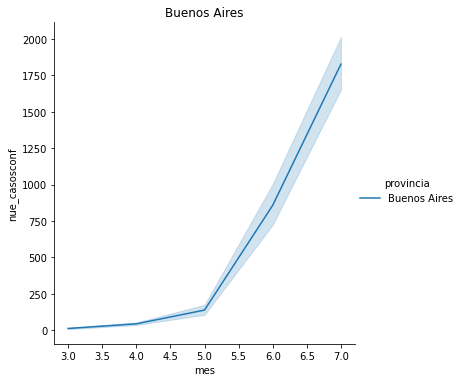

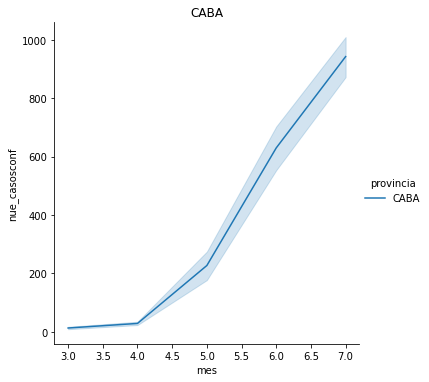

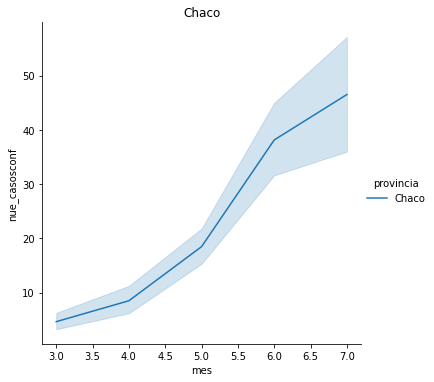

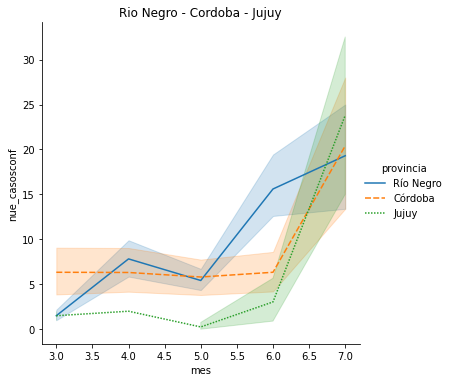

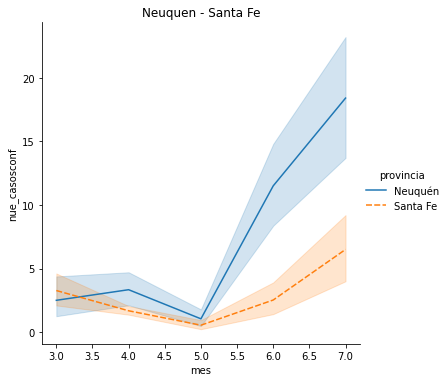

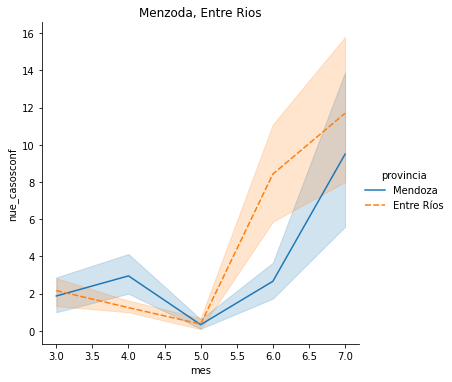

In [13]:

g = sns.relplot(data=buenos_aires, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Buenos Aires")

g = sns.relplot(data=caba, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("CABA")

g = sns.relplot(data=chaco, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Chaco")

g = sns.relplot(data=ciencuenta, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Rio Negro - Cordoba - Jujuy")

g = sns.relplot(data=treinta, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Neuquen - Santa Fe")

g = sns.relplot(data=veinte, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")
g.ax.set_title("Menzoda, Entre Rios")

Esta salida representa el mismo grafico anterior pero agrupando las provincias con casos similares para poder apreciar su curva de crecimiento.

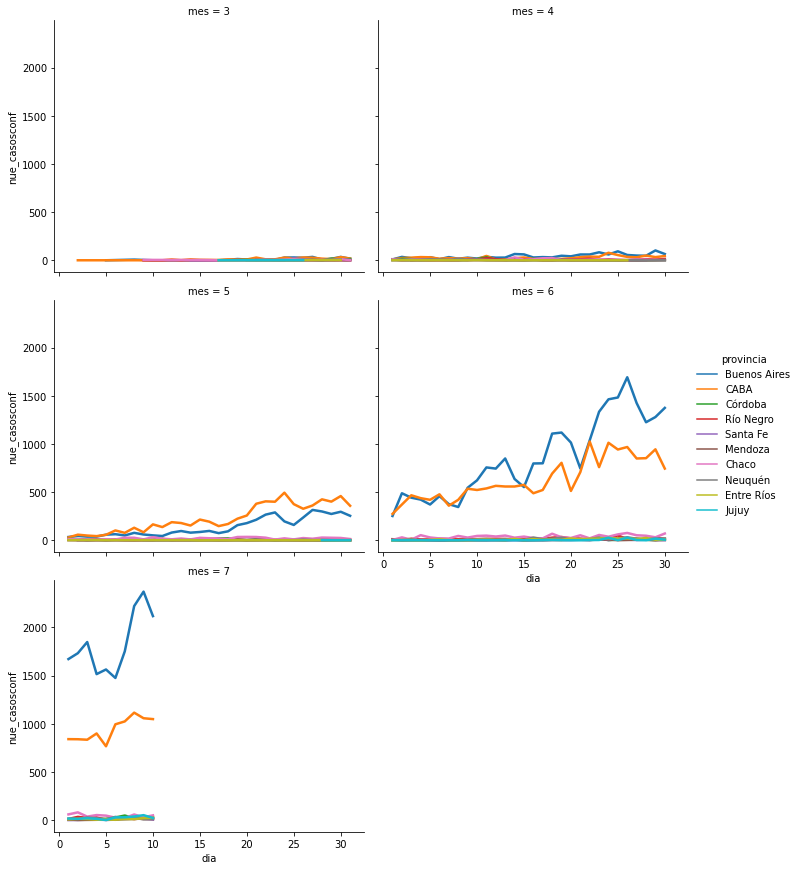

In [14]:
sns.relplot(data=df, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)
#g.axes.set_titles("Curva de Crecimiento en dias facetada")

Este tercer grafico representa la curva de crecimiento de las 10 provincias con mas casos, durante los meses de marzo a julio, facetado en meses. Se observa que si bien la "curva" tiene picos son menores comparados con el primer grafico donde estan los 5 meses comprimidos. 

Buenos Aires


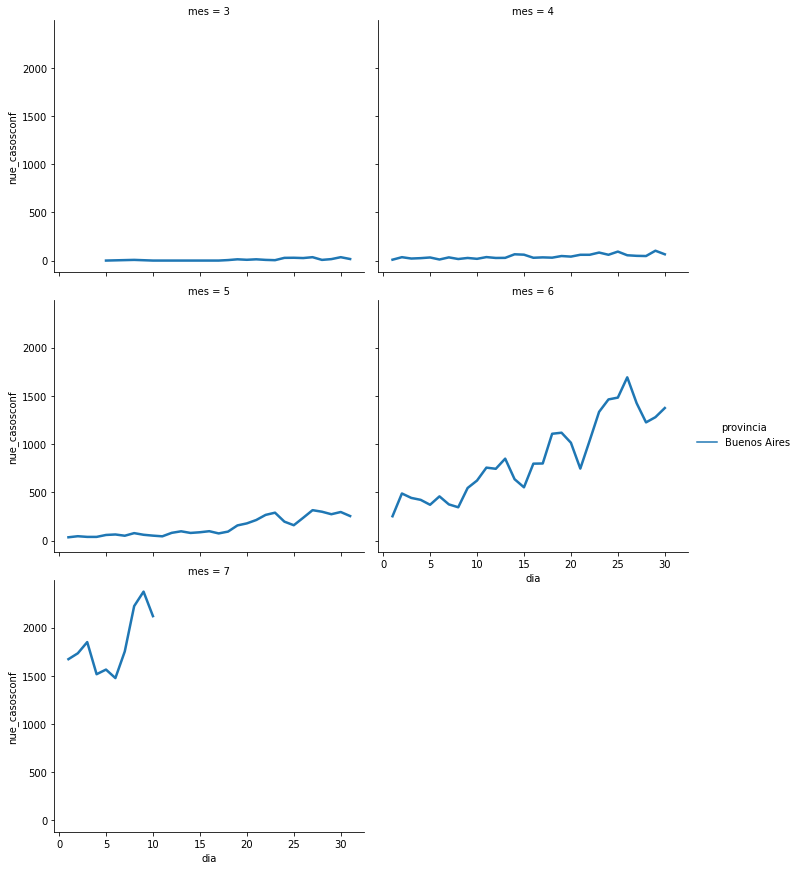

In [15]:
print("Buenos Aires")
sns.relplot(data=buenos_aires, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

CABA


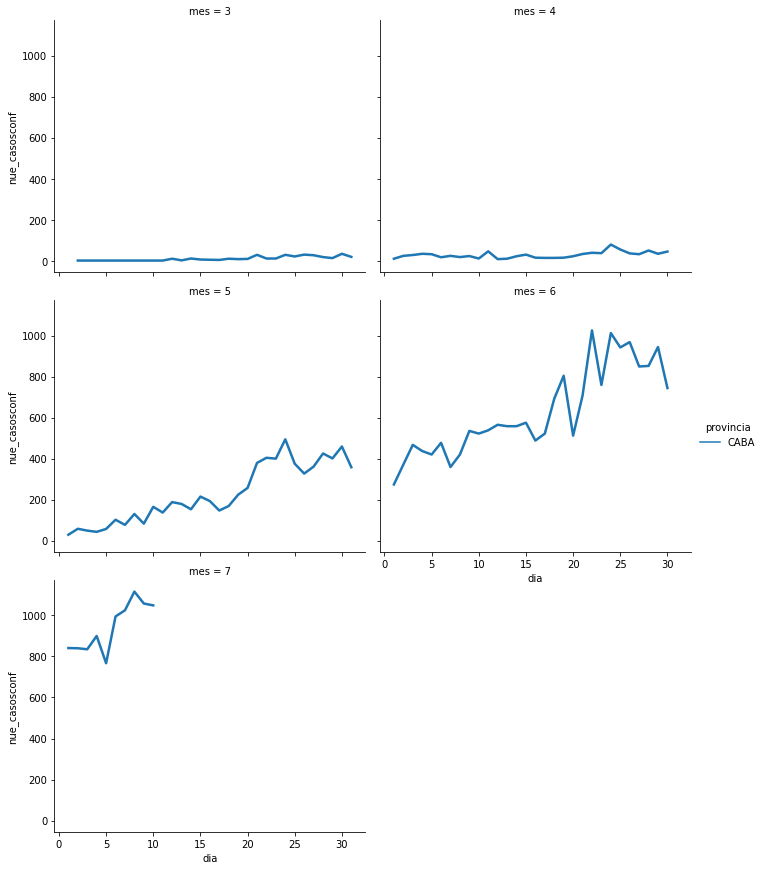

In [16]:
print("CABA")
sns.relplot(data=caba, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Chaco


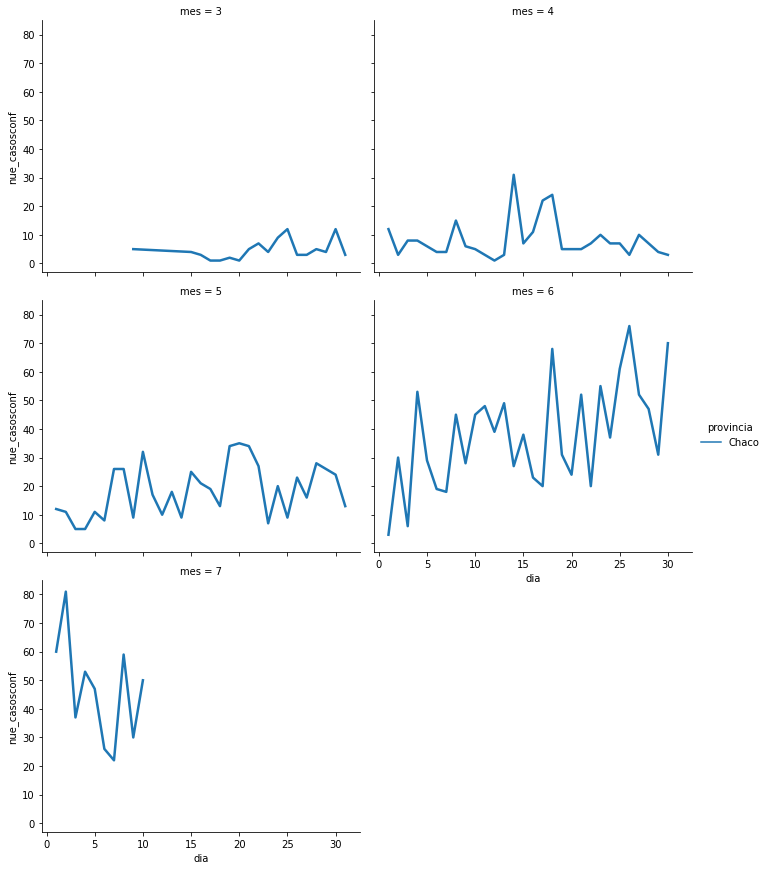

In [17]:
print("Chaco")
sns.relplot(data=chaco, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Rio Negro - Cordoba - Jujuy


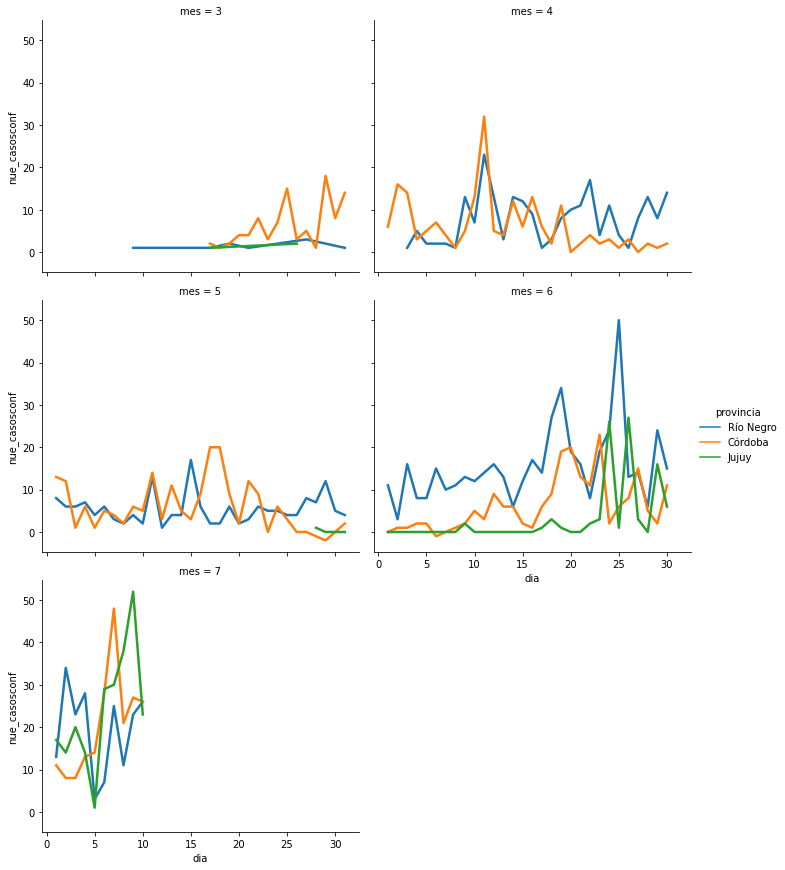

In [18]:
print("Rio Negro - Cordoba - Jujuy")
sns.relplot(data=ciencuenta, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Neuquen - Santa Fe


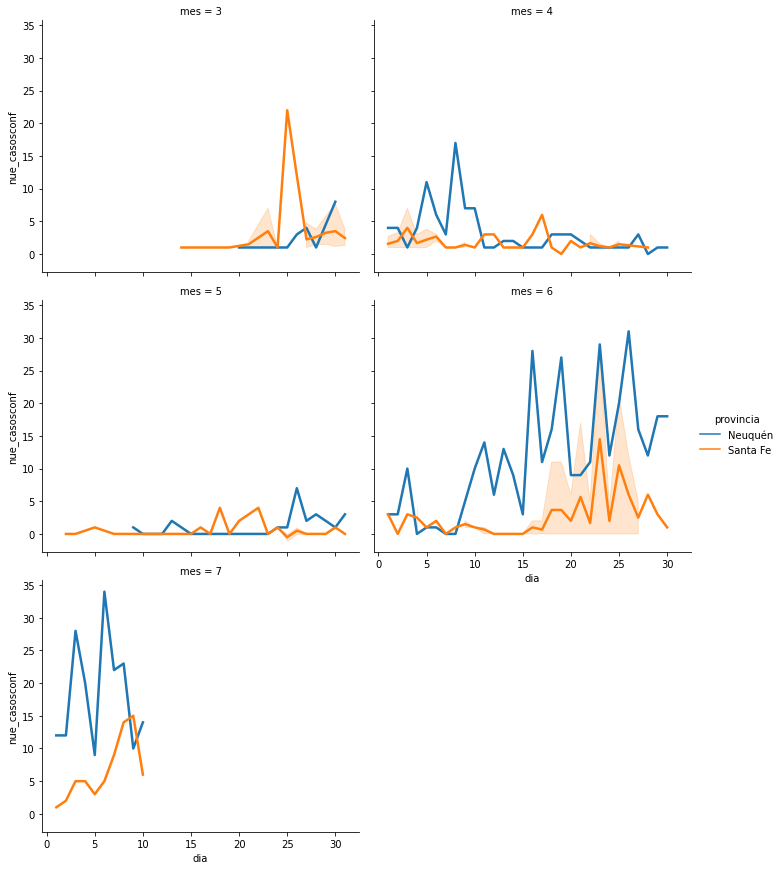

In [19]:
print("Neuquen - Santa Fe")
sns.relplot(data=treinta, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Menzoda, Entre Rios


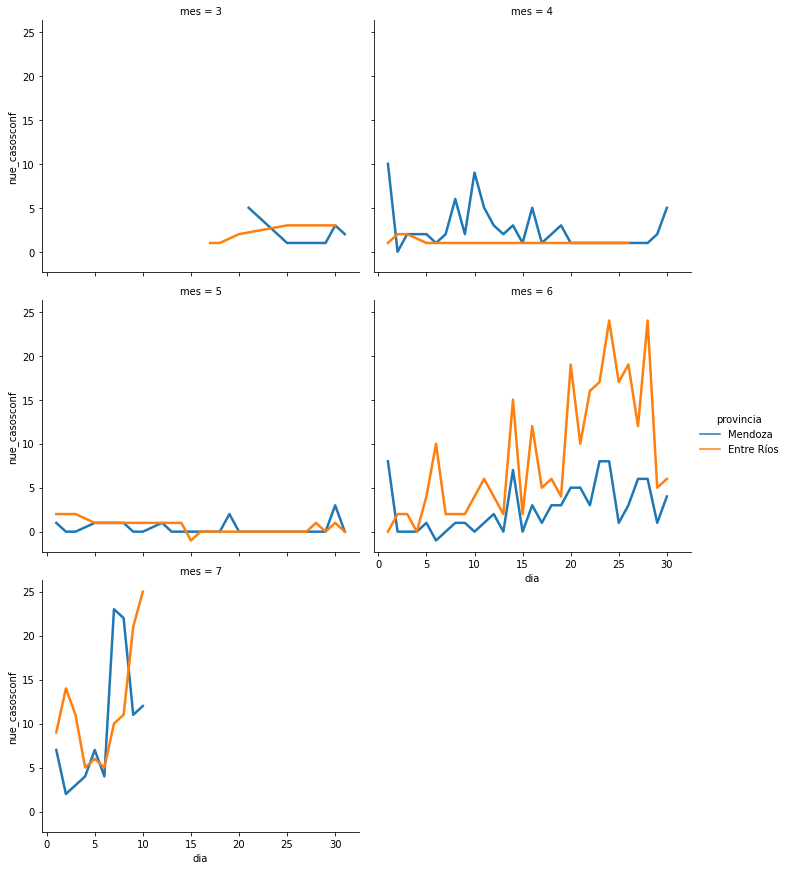

In [20]:
print("Menzoda, Entre Rios")
sns.relplot(data=veinte, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Estas ultimas seis salidas representan el mismo grafico anterior (de las celda 14) pero agrupando las provincias con casos similares para poder apreciar su curva de crecimiento.

# PUNTO 1.b

### 1. Cargo los datos del csv reducido en columnas

In [47]:
mydateparser = lambda x:datetime.strptime(x, "%d/%m/%Y" )
datos = pd.read_csv('datos_sin_columna.csv', parse_dates=['fecha'],date_parser=mydateparser)
df = pd.DataFrame(datos)
df

,total_pop,fecha,provincia,tot_casosconf,nue_casosconf
0,13827203,2020-03-05,Buenos Aires,2,1
1,13827203,2020-03-08,Buenos Aires,10,8
2,13827203,2020-03-10,Buenos Aires,20,1
3,13827203,2020-03-11,Buenos Aires,22,1
4,13827203,2020-03-13,Buenos Aires,34,1
...,...,...,...,...,...
1891,127205,2020-07-06,Tierra del Fuego,80447,0
1892,127205,2020-07-07,Tierra del Fuego,83426,0
1893,127205,2020-07-08,Tierra del Fuego,87029,0
1894,127205,2020-07-09,Tierra del Fuego,90692,1


### 2. Calculo la penetracion de casos por dia y lo adjunto al dataframe

In [22]:
casos_cada_100_mil = []
casos_cada_100_mil = (df['nue_casosconf']/df['total_pop'])
df['casos_cada_100_mil'] = casos_cada_100_mil
df

,total_pop,fecha,provincia,tot_casosconf,nue_casosconf,casos_cada_100_mil
0,13827203,2020-03-05,Buenos Aires,2,1,7.232121e-08
1,13827203,2020-03-08,Buenos Aires,10,8,5.785696e-07
2,13827203,2020-03-10,Buenos Aires,20,1,7.232121e-08
3,13827203,2020-03-11,Buenos Aires,22,1,7.232121e-08
4,13827203,2020-03-13,Buenos Aires,34,1,7.232121e-08
...,...,...,...,...,...,...
1891,127205,2020-07-06,Tierra del Fuego,80447,0,0.000000e+00
1892,127205,2020-07-07,Tierra del Fuego,83426,0,0.000000e+00
1893,127205,2020-07-08,Tierra del Fuego,87029,0,0.000000e+00
1894,127205,2020-07-09,Tierra del Fuego,90692,1,7.861326e-06


### 3. Busco las 10 provincias con mayor penetracion de casos

In [23]:
group_p = df.groupby('provincia')

provincias = []
for key, item in group_p:
    provincias.append({"provincia":key, "penetracion":item['casos_cada_100_mil'].sum()})

In [24]:
provincias.sort(key=lambda c: c['penetracion'], reverse=True)
print("10 provincias con mas penetracion de casos \n")

for i in range(10):    
    print(provincias[i]['provincia'])

10 provincias con mas penetracion de casos 

CABA
Buenos Aires
Chaco
Río Negro
Tierra del Fuego
Neuquén
La Rioja
Jujuy
Entre Ríos
Chubut


### 4. Borro del dataframe las provincias que no me interesan

In [25]:
provincias_borrar = ['Santa Fe','Mendoza','Córdoba','Catamarca', 'Corrientes','Formosa','La Pampa','Misiones','Salta', 'San Juan','San Luis','Santa Cruz', 'Santiago del Estero', 'Tucumán']

for provin in provincias_borrar:
    df = df.drop(df[df['provincia']==provin].index)

group_p = df.groupby('provincia')

provincias = []
for key, item in group_p:
     provincias.append({"provincia":key, "penetracion":item['casos_cada_100_mil'].sum()})
provincias.sort(key=lambda c: c['penetracion'], reverse=True)

### 5. Parseo la fecha y la agrego al df (para poder agrupar los datos en los graficos)

In [26]:
dias = []
meses = []
anios = []

for i in df.index:
    dias.append(df['fecha'][i].day)
    meses.append(df['fecha'][i].month)
    anios.append(df['fecha'][i].year)

df['dia'] = dias
df['mes'] = meses
df['anio'] = anios

df

,total_pop,fecha,provincia,tot_casosconf,nue_casosconf,casos_cada_100_mil,dia,mes,anio
0,13827203,2020-03-05,Buenos Aires,2,1,7.232121e-08,5,3,2020
1,13827203,2020-03-08,Buenos Aires,10,8,5.785696e-07,8,3,2020
2,13827203,2020-03-10,Buenos Aires,20,1,7.232121e-08,10,3,2020
3,13827203,2020-03-11,Buenos Aires,22,1,7.232121e-08,11,3,2020
4,13827203,2020-03-13,Buenos Aires,34,1,7.232121e-08,13,3,2020
...,...,...,...,...,...,...,...,...,...
1891,127205,2020-07-06,Tierra del Fuego,80447,0,0.000000e+00,6,7,2020
1892,127205,2020-07-07,Tierra del Fuego,83426,0,0.000000e+00,7,7,2020
1893,127205,2020-07-08,Tierra del Fuego,87029,0,0.000000e+00,8,7,2020
1894,127205,2020-07-09,Tierra del Fuego,90692,1,7.861326e-06,9,7,2020


### 6. Agrupo provincias con cantidad similar

In [27]:
buenos_aires = df[df['provincia']== 'Buenos Aires']
caba = df[df['provincia']== 'CABA']

bs_as = caba.append(buenos_aires,ignore_index=True)


rnegro = df[df['provincia']=='Río Negro']
chaco = df[df['provincia']== 'Chaco']
jujuy = df[df['provincia']=='Jujuy']
fuego = df[df['provincia']=='Tierra del Fuego']
neuquen = df[df['provincia']=='Neuquén']
rioja = df[df['provincia']=='La Rioja']
rios = df[df['provincia']=='Entre Ríos']
ch = df[df['provincia']=='Chubut']


ciencuenta = rnegro.append(chaco, ignore_index=True)
ciencuenta = ciencuenta.append(neuquen, ignore_index=True)
ciencuenta = ciencuenta.append(fuego, ignore_index=True)


veinte = jujuy.append(rioja, ignore_index=True)
veinte = veinte.append(rios, ignore_index=True)
veinte = veinte.append(ch, ignore_index=True)

### 7. Empiezo a graficar

Text(0.5, 1.0, 'Curva de Penetracion en Dias')

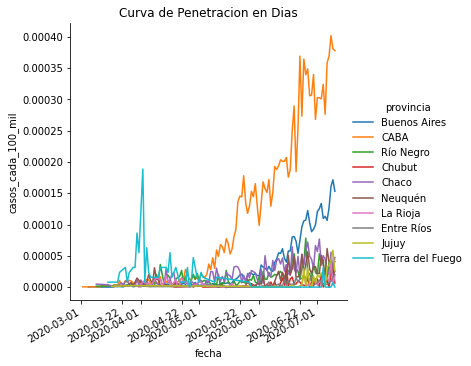

In [28]:
g= sns.relplot(data=df, x="fecha", y="casos_cada_100_mil", hue="provincia", kind="line")
g.fig.autofmt_xdate()
g.ax.set_title("Curva de Penetracion en Dias")    

Este primer grafico representa la curva de de crecimiento de las 10 provincias con mayor penetracion, durante los meses de marzo a julio. Como la cantidad de casos varia de una provincia a otra al igual que sus habitantes, aquellas que tienen menor cantidad de casos y menor cantidad de habitantes no se aprecian en el grafico de forma clara.

Text(0.5, 1.0, 'Jujuy - La Rioja - Entre Rios - Chubut')

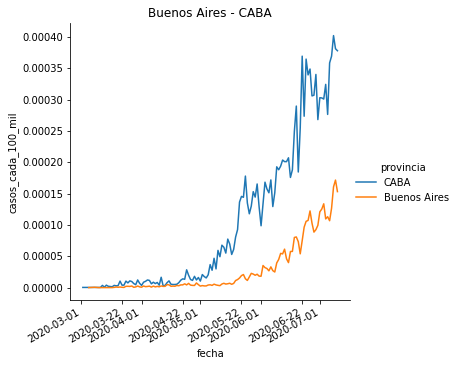

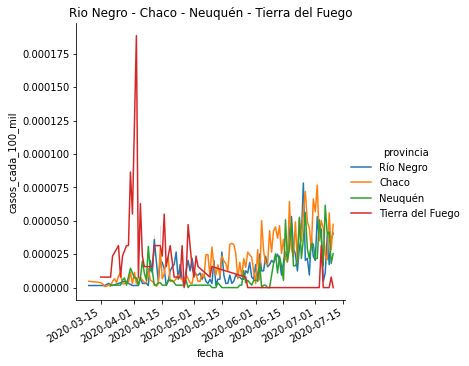

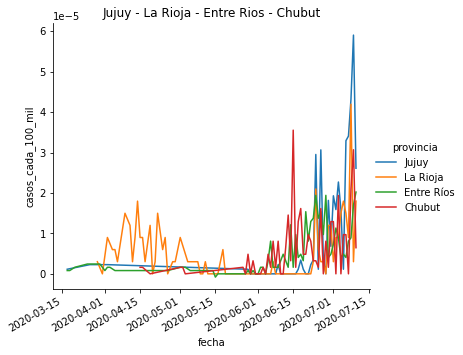

In [29]:
g= sns.relplot(data=bs_as, x="fecha", y="casos_cada_100_mil", hue="provincia", kind="line")
g.fig.autofmt_xdate()
g.ax.set_title("Buenos Aires - CABA")

g= sns.relplot(data=ciencuenta, x="fecha", y="casos_cada_100_mil", hue="provincia", kind="line")
g.fig.autofmt_xdate()
g.ax.set_title("Rio Negro - Chaco - Neuquén - Tierra del Fuego")

g= sns.relplot(data=veinte, x="fecha", y="casos_cada_100_mil", hue="provincia", kind="line")
g.fig.autofmt_xdate()
g.ax.set_title("Jujuy - La Rioja - Entre Rios - Chubut")

Esta salida representa el mismo grafico anterior pero agrupando las provincias con penetracion similar para poder apreciar su curva de crecimiento.

Text(0.5, 1.0, 'Curva de Penetracion en Meses')

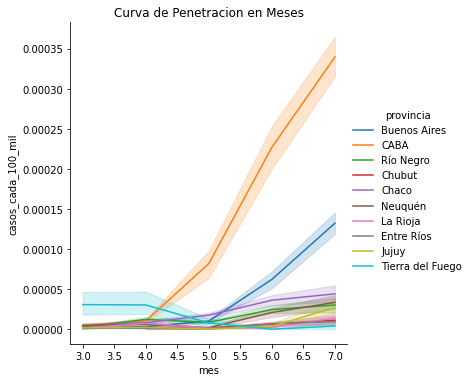

In [30]:
g= sns.relplot(data=df, x="mes", y="casos_cada_100_mil", hue="provincia", kind="line")
g.ax.set_title("Curva de Penetracion en Meses")   

Este segundo grafico representa la curva de crecimiento de las 10 provincias con mayor penetracion, durante los meses de marzo a julio, pero teniendo en cuenta el mes en lugar de los dias. Se puede observar una curva sin tantos picos.

Text(0.5, 1.0, 'Jujuy - La Rioja - Entre Rios - Chubut')

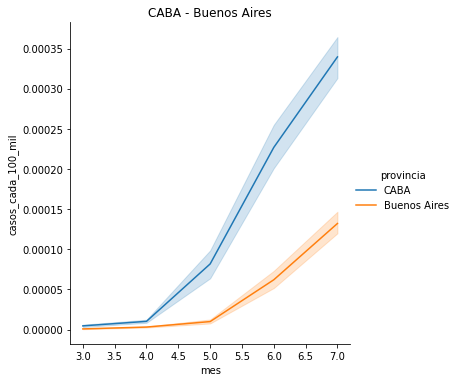

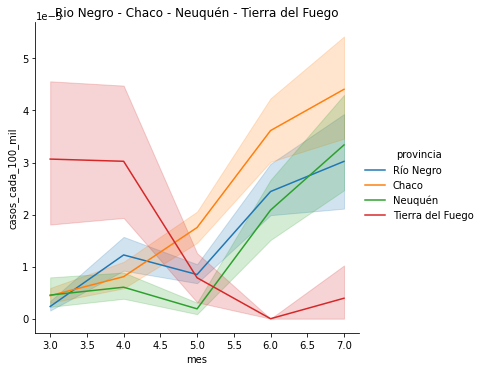

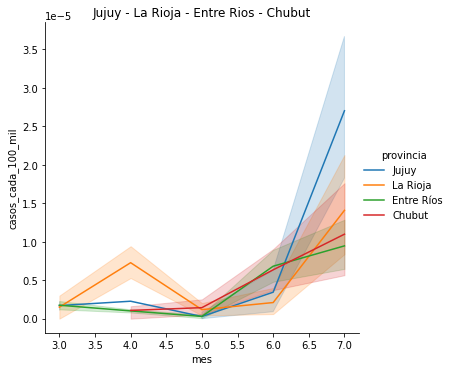

In [31]:
g= sns.relplot(data=bs_as, x="mes", y="casos_cada_100_mil", hue="provincia", kind="line")
g.ax.set_title("CABA - Buenos Aires")

g= sns.relplot(data=ciencuenta, x="mes", y="casos_cada_100_mil", hue="provincia", kind="line")
g.ax.set_title("Rio Negro - Chaco - Neuquén - Tierra del Fuego")

g= sns.relplot(data=veinte, x="mes", y="casos_cada_100_mil", hue="provincia", kind="line")
g.ax.set_title("Jujuy - La Rioja - Entre Rios - Chubut")   

Esta salida representa el mismo grafico anterior pero agrupando las provincias con penetracion similar para poder apreciar su curva de crecimiento.

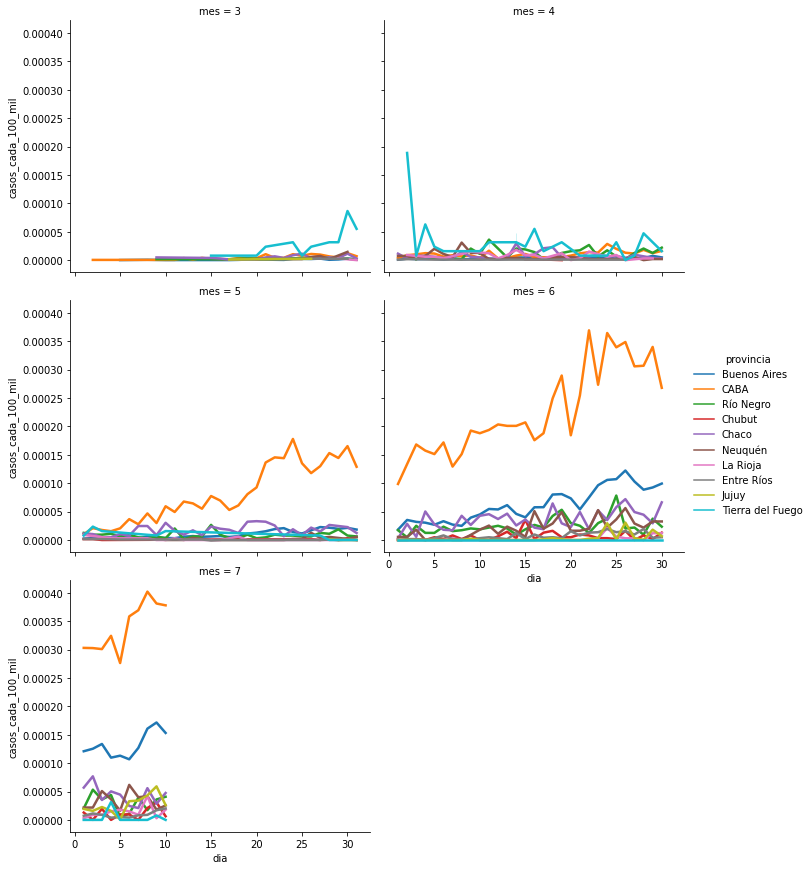

In [32]:
sns.relplot(data=df, x="dia", y="casos_cada_100_mil", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Este tercer grafico representa la curva de crecimiento de las 10 provincias con mayor penetracion, durante los meses de marzo a julio, facetado en meses. Se observa que si bien la "curva" tiene picos son menores comparados con el primer grafico donde estan los 5 meses comprimidos, lo que permite compararlos mejor.

CABA - Buenos Aires


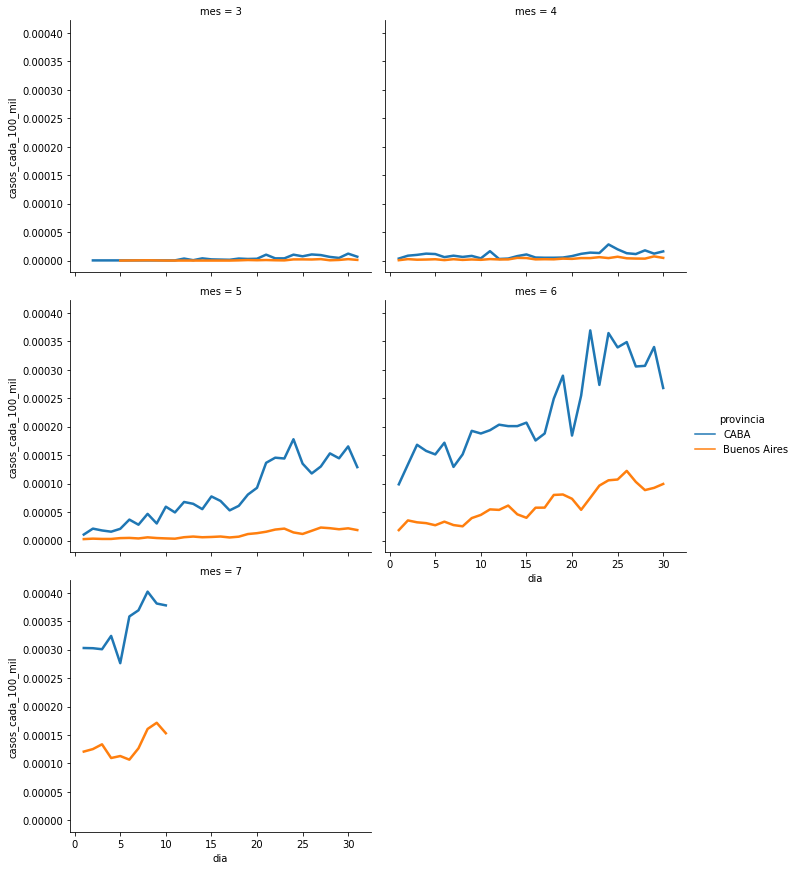

In [33]:
print("CABA - Buenos Aires")
sns.relplot(data=bs_as, x="dia", y="casos_cada_100_mil", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Rio Negro - Chaco - Neuquén - Tierra del Fuego


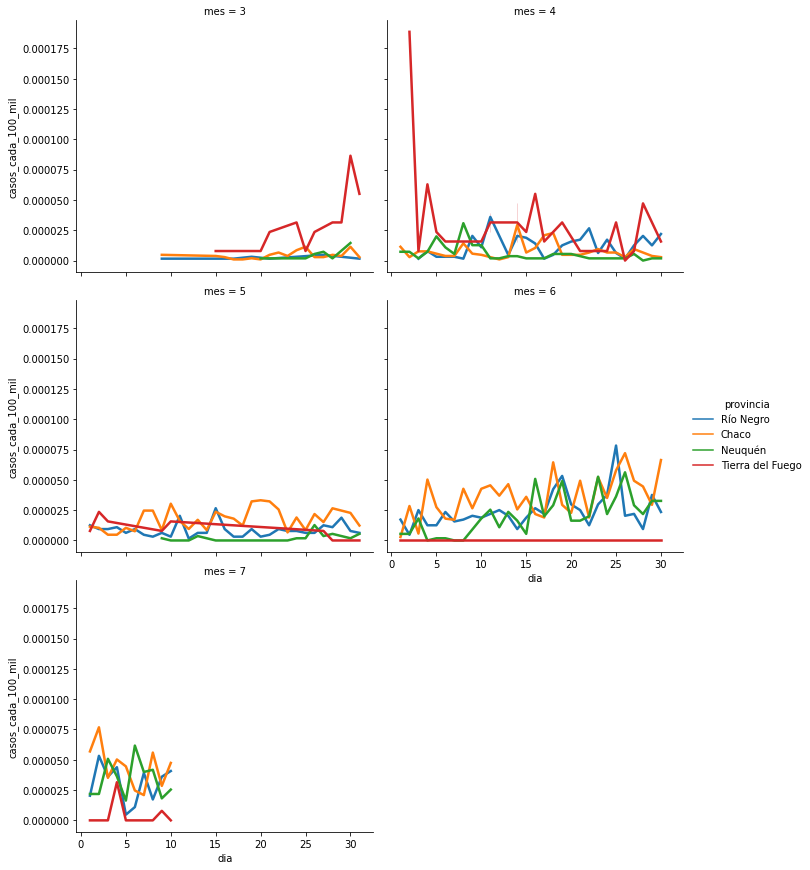

In [34]:
print("Rio Negro - Chaco - Neuquén - Tierra del Fuego")
sns.relplot(data=ciencuenta, x="dia", y="casos_cada_100_mil", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Jujuy - La Rioja - Entre Rios - Chubut


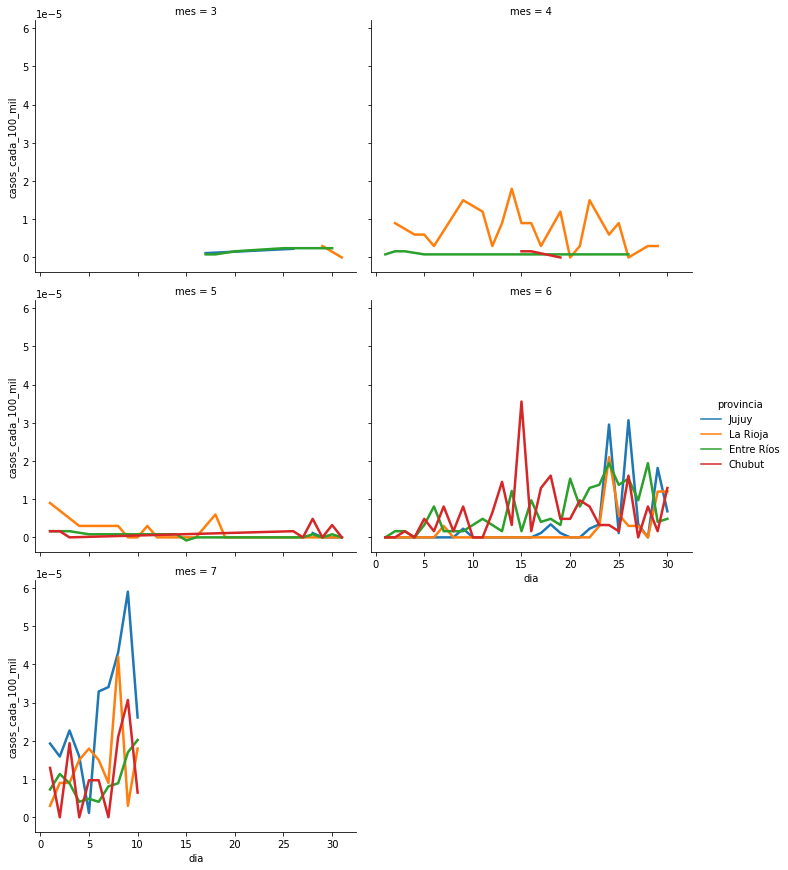

In [35]:
print("Jujuy - La Rioja - Entre Rios - Chubut")
sns.relplot(data=veinte, x="dia", y="casos_cada_100_mil", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Estas ultimas tres salidas representan el mismo grafico anterior (de las celda 32) pero agrupando las provincias con penetracion similar para poder apreciar su curva de crecimiento.

# PUNTO 1.c

### 1. Tomar datos del csv genereado en el TP3

In [43]:
mydateparser = lambda x: datetime.strptime(x, "%d/%m/%Y" )
datos = pd.read_csv('innerjoins.csv', parse_dates=['fecha'],date_parser=mydateparser)
df = pd.DataFrame(datos)
df

,code,name,pop_dens,total_pop,country_percentage,fecha,dia_inicio,dia_cuarentena,provincia,ciudad,tot_casosconf,nue_casosconf,tot_fallecidos,transmision_tipo,informe_tipo,fuente
0,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-05,4,0,Buenos Aires,C_Indeterminada,2,1,2,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...
1,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-08,7,0,Buenos Aires,C_Indeterminada,10,8,2,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...
2,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-10,9,0,Buenos Aires,C_Indeterminada,20,1,3,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...
3,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-11,10,0,Buenos Aires,C_Indeterminada,22,1,4,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...
4,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-13,9,0,Buenos Aires,C_Indeterminada,34,1,4,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-06,124,108,Tierra del Fuego,C_Indeterminada,80447,0,1582,transmision comunitaria,informe provincial,NaN
1892,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-07,125,109,Tierra del Fuego,C_Indeterminada,83426,0,1643,transmision comunitaria,informe provincial,NaN
1893,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-08,126,110,Tierra del Fuego,C_Indeterminada,87029,0,1694,transmision comunitaria,informe provincial,NaN
1894,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-09,127,111,Tierra del Fuego,C_Indeterminada,90692,1,1720,transmision comunitaria,informe provincial,NaN


### 2. Parseo la fecha

In [44]:
dias = []
meses = []
anios = []

for i in df.index:
    dias.append(df['fecha'][i].day)
    meses.append(df['fecha'][i].month)
    anios.append(df['fecha'][i].year)

df['dia'] = dias
df['mes'] = meses
df['anio'] = anios

df

,code,name,pop_dens,total_pop,country_percentage,fecha,dia_inicio,dia_cuarentena,provincia,ciudad,tot_casosconf,nue_casosconf,tot_fallecidos,transmision_tipo,informe_tipo,fuente,dia,mes,anio
0,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-05,4,0,Buenos Aires,C_Indeterminada,2,1,2,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,5,3,2020
1,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-08,7,0,Buenos Aires,C_Indeterminada,10,8,2,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,8,3,2020
2,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-10,9,0,Buenos Aires,C_Indeterminada,20,1,3,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,10,3,2020
3,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-11,10,0,Buenos Aires,C_Indeterminada,22,1,4,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,11,3,2020
4,AR-B,Buenos Aires,"44,95",13827203,"38,13",2020-03-13,9,0,Buenos Aires,C_Indeterminada,34,1,4,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,13,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-06,124,108,Tierra del Fuego,C_Indeterminada,80447,0,1582,transmision comunitaria,informe provincial,NaN,6,7,2020
1892,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-07,125,109,Tierra del Fuego,C_Indeterminada,83426,0,1643,transmision comunitaria,informe provincial,NaN,7,7,2020
1893,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-08,126,110,Tierra del Fuego,C_Indeterminada,87029,0,1694,transmision comunitaria,informe provincial,NaN,8,7,2020
1894,AR-V,Tierra del Fuego,"5,92",127205,"0,32",2020-07-09,127,111,Tierra del Fuego,C_Indeterminada,90692,1,1720,transmision comunitaria,informe provincial,NaN,9,7,2020


### 3. Elimino las columnas que no se necesitan

In [45]:
df.drop(['fecha','code','name','pop_dens','country_percentage','dia_inicio','dia_cuarentena','ciudad','informe_tipo','fuente', 'dia', 'anio'], axis='columns', inplace=True)
df

,total_pop,provincia,tot_casosconf,nue_casosconf,tot_fallecidos,transmision_tipo,mes
0,13827203,Buenos Aires,2,1,2,importado,3
1,13827203,Buenos Aires,10,8,2,importado,3
2,13827203,Buenos Aires,20,1,3,importado,3
3,13827203,Buenos Aires,22,1,4,importado,3
4,13827203,Buenos Aires,34,1,4,importado,3
...,...,...,...,...,...,...,...
1891,127205,Tierra del Fuego,80447,0,1582,transmision comunitaria,7
1892,127205,Tierra del Fuego,83426,0,1643,transmision comunitaria,7
1893,127205,Tierra del Fuego,87029,0,1694,transmision comunitaria,7
1894,127205,Tierra del Fuego,90692,1,1720,transmision comunitaria,7


### 4. Grafico

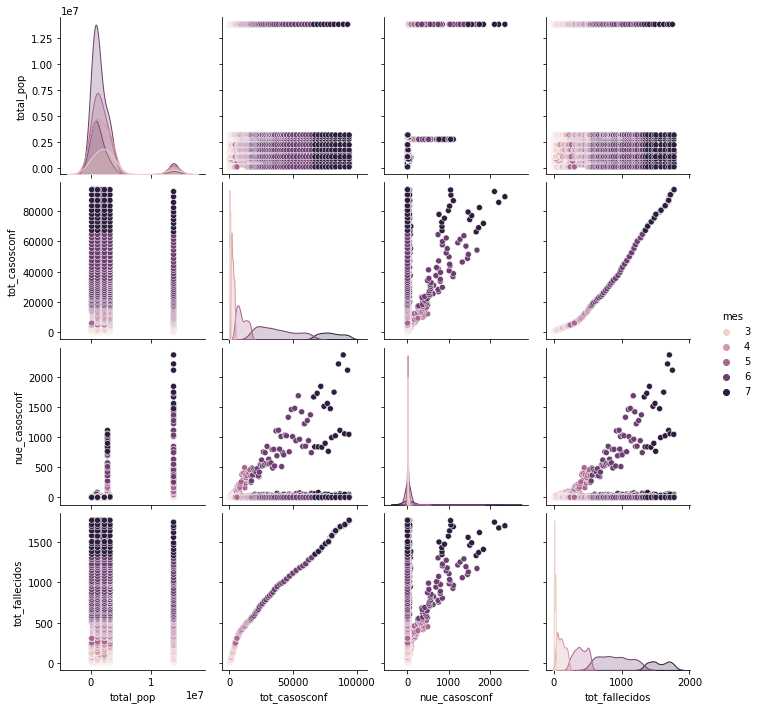

In [39]:
sns.pairplot(df,  hue="mes")

En el grafico anterior se observa una relacion de a pares de los datos del df creado anteriormente. 

/home/lucila/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucila/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucila/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucila/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucila/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWar

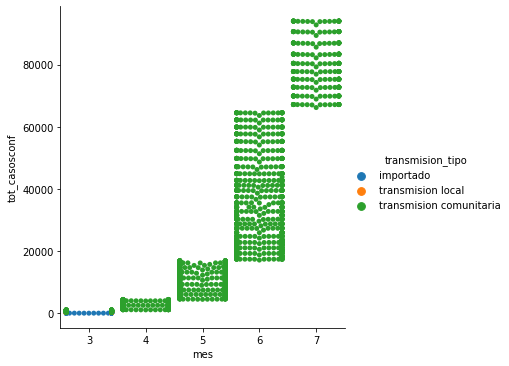

In [46]:
sns.catplot(x="mes", y="tot_casosconf", hue="transmision_tipo", kind="swarm", data=df)

En el grafico se observa como a partir de Abril los casos eran solo de transmision comunitaria.